# **1. Import Library dan DataSet**

In [1]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score


#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------

import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [2]:
#import dataset
df1=pd.read_csv('adult.csv')
df2=pd.read_csv('adult.test.csv')

In [3]:
df1

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df2.head(3)

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.


df2 belum memiliki nama kolom,

In [5]:
#Membuat nama kolom untuk df2
df2.columns=df1.columns

In [6]:
df2

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16276,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## 1.1 Menggabungkan df1 dan df2

In [7]:
#Menggabungkan kedua dataframe
df = pd.concat([df1,df2],axis=0)

In [8]:
df

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16276,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# **2. Exploratory Data Analysis**

## 2.1 Info dan Statistik Dasar dari DataFrame

In [9]:
#info dasar dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48841 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48841 non-null  int64 
 1   Workclass       48841 non-null  object
 2   Final Weight    48841 non-null  int64 
 3   Education       48841 non-null  object
 4   EducationNum    48841 non-null  int64 
 5   Marital Status  48841 non-null  object
 6   Occupation      48841 non-null  object
 7   Relationship    48841 non-null  object
 8   Race            48841 non-null  object
 9   Gender          48841 non-null  object
 10  Capital Gain    48841 non-null  int64 
 11  capital loss    48841 non-null  int64 
 12  Hours per Week  48841 non-null  int64 
 13  Native Country  48841 non-null  object
 14  Income          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


Penjelasan untuk tiap-tiap kolom :
- **`age`**: umur dari individu.
- **`workclass`**: tipe dari pekerjaan individu l. Workclass ini berisi kategori seperti:
    - Private: Bekerja di sektor private.
    - Self-emp-not-inc: Individu yang bekerja sendiri dan tidak tergabung dalam sebuah perusahaan.
    - Self-emp-inc: Individu yang bekerja sendiri dan tergabung dalam sebuah perusahaan.
    - Federal-gov: Bekerja pada pemerintahan pusat.
    - Local-gov: Bekerja pada pemerintahan lokal.
    - State-gov: Bekerja pada pemerintahan negara bagian.
    - Without-pay: Tidak bekerja atau bekerja tapi tidak diupah.
    - Never-worked: Tidak pernah bekerja.
- **`education`**: Pendidikan Terakhir.
- **`education-num`**: Durasi dalam menyelesaikan pendidikan.
- **`marital-status`**: Status Pernikahan.
- **`occupation`**: Bidang pekerjaan atau jabatan.
- **`relationship`**: Status Hubungan.
- **`race`**: ras dari individu.
- **`sex`**: Gender dari individu.
- **`capital-gain`**: Jumlah keuntungan modal(financial profit).
- **`capital-loss`**: Jumlah kerugian modal.
- **`hours-per-week`**: Jumlah jam kerja per-minggu.
- **`native-country`**: Negara asal.
- **`income`**: Level gaji dari individu. terdiri dari 2 kategori yaitu gaji yang lebih dari 50,000 dollar dan gaji  yang kurang dari atau sama dengan  50,000 dollar, keduanya ditulis dengan (>50K, <=50K).
- **`Final Weight`**: The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls.

In [10]:
#Statistik dasar untuk semua kolom kategorikal
df.describe(include='O')

,Workclass,Education,Marital Status,Occupation,Relationship,Race,Gender,Native Country,Income
count,48841,48841,48841,48841,48841,48841,48841,48841,48841
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33905,15784,22379,6172,19716,41762,32649,43831,24720


In [11]:
#Statistik dasar untuk semua kolom numerik
df.describe()

,Age,Final Weight,EducationNum,Capital Gain,capital loss,Hours per Week
count,48841.000000,4.884100e+04,48841.000000,48841.000000,48841.000000,48841.000000
mean,38.643865,1.896634e+05,10.078152,1079.089720,87.504105,40.422391
std,13.710511,1.056050e+05,2.570961,7452.093748,403.008483,12.391571
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781420e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376460e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## 2.2 Menghapus duplicate values

In [12]:
#memeriksa duplicate values
df.duplicated().sum()

29

Terdapat 29 baris dalam dataframe yang terindikasi double atau berduplikasi.

In [13]:
#menghapus duplicate values
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16276,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


Terdapat 48.812 baris × 15 kolom pada dataframe setelah ditreatment.

## 2.3 Memeriksa dan mengatasi null values

In [16]:
df.isna().sum()

Age               0
Workclass         0
Final Weight      0
Education         0
EducationNum      0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital Gain      0
capital loss      0
Hours per Week    0
Native Country    0
Income            0
dtype: int64

Tidak ada null values untuk diatasi

## 2.4 Mengatasi Error pada data Entry

In [17]:
#Memeriksa semua value pada setiap kolom kategorikal pada dataframe
for column in df:
  if df[column].dtype == 'object':
    print(f"{column} - ({df[column].nunique()}) : {df[column].unique()} , \n----------------------------------------------------------------------------------------------")

Workclass - (9) : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] , 
----------------------------------------------------------------------------------------------
Education - (16) : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] , 
----------------------------------------------------------------------------------------------
Marital Status - (7) : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] , 
----------------------------------------------------------------------------------------------
Occupation - (15) : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-su

Dari penjabaran diatas ada beberapa kolom yang mengalami error pada data entry dan perlu diubah agar menghasilkan dataframe yang bersih, diantaranya yaitu : workclass, occupation dan income.

selain itu juga terdapat spasi " " di setiap awal kata dari data kategorikal, jadi harus dihapus

### 2.4.1 kolom workclass (Mengganti values "?" menjadi "other")

In [18]:
#Memeriksa jumlah dari masing-masing values #isi '?' ke "others"
df['Workclass'].value_counts()

Workclass
 Private             33878
 Self-emp-not-inc     3861
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1694
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: count, dtype: int64

In [19]:
#mengganti value "?" pada workclass menjadi "other"
df['Workclass'] = df['Workclass'].replace(' ?', 'Other')

C:\Users\Inne Andarini\AppData\Local\Temp\ipykernel_20048\2014569554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Workclass'] = df['Workclass'].replace(' ?', 'Other')


### 2.4.2 kolom occupation (Mengganti values "?" menjadi "Other-service")

In [20]:
#Memeriksa jumlah dari masing-masing values
df['Occupation'].value_counts()

Occupation
 Prof-specialty       6167
 Craft-repair         6107
 Exec-managerial      6084
 Adm-clerical         5608
 Sales                5504
 Other-service        4919
 Machine-op-inspct    3018
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2071
 Farming-fishing      1487
 Tech-support         1445
 Protective-serv       983
 Priv-house-serv       240
 Armed-Forces           15
Name: count, dtype: int64

In [21]:
#mengganti value "?" pada occupation menjadi "Other-service"
df['Occupation'] = df['Occupation'].replace(' ?', ' Other-service')

C:\Users\Inne Andarini\AppData\Local\Temp\ipykernel_20048\4225065901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = df['Occupation'].replace(' ?', ' Other-service')


### 2.4.3 kolom Native Country (Menyederhanakan value menjadi United-States dan non United-States)

In [22]:
#Memeriksa jumlah dari masing-masing values
df['Native Country'].value_counts()

Native Country
 United-States                 43809
 Mexico                          947
 ?                               856
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Poland                           87
 Guatemala                        86
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua             

C:\Users\Inne Andarini\AppData\Local\Temp\ipykernel_20048\3070937646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Native Country"] = np.where(df["Native Country"]==' United-States', 'USA', 'Non-USA')


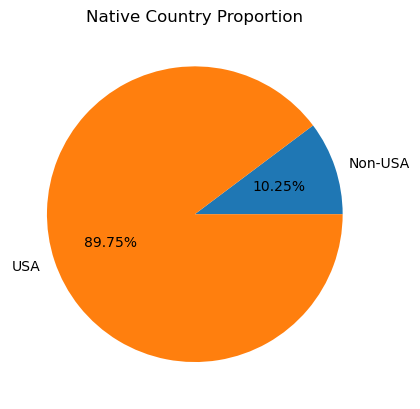

In [23]:
# Simplify Native Country
df["Native Country"] = np.where(df["Native Country"]==' United-States', 'USA', 'Non-USA')

Native_Country = df.groupby(["Native Country"]).size()

plt.title('Native Country Proportion')
plt.pie(Native_Country, labels=Native_Country.index, autopct=lambda p: f'{p:.2f}%')
plt.show();

### 2.4.4 Kolom income (menggabungkan values income menjadi 2 values saja)

<Axes: xlabel='Income', ylabel='count'>

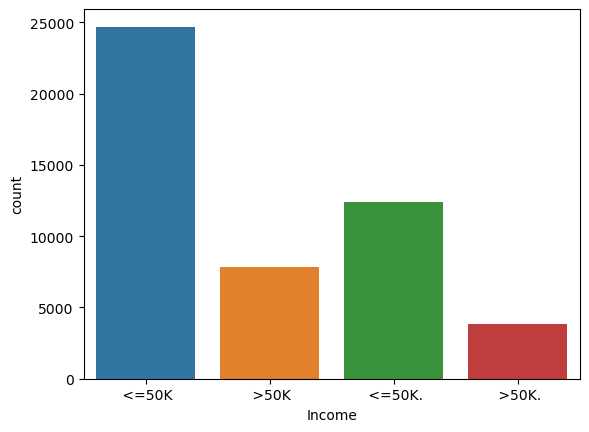

In [24]:
#menggunakan countplot untuk memeriksa values pada kolom Income
sns.countplot(data=df,x='Income')

Terdapat error dalam entry data, dimana seharusnya hanya terdapat dua kategori saja dalam kolom Income. Untuk mengatasinya kita perlu menghapus titik "." pada akhir values.

In [25]:
df['Income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [26]:
df.replace({'Income':{" >50K.":" >50K" ,  " <=50K.":" <=50K"}},inplace=True)

C:\Users\Inne Andarini\AppData\Local\Temp\ipykernel_20048\3864447608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Income':{" >50K.":" >50K" ,  " <=50K.":" <=50K"}},inplace=True)


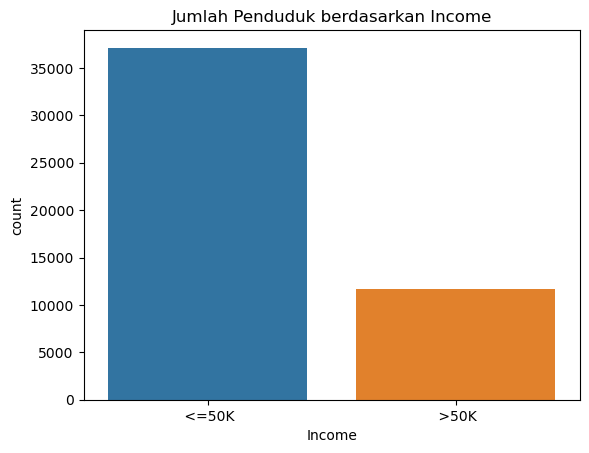

In [27]:
#menggunakan countplot untuk memeriksa kembali values pada kolom Income
sns.countplot(data=df,x='Income')
plt.title('Jumlah Penduduk berdasarkan Income')
plt.show()

### 2.4.5 Menghapus spasi " " di setiap awal kata data kategorikal

In [28]:
#menggunakan funcion str.strip.() untuk menghapus spasi
for column in df:
  if df[column].dtype == 'object':
    df[column] = df[column].str.strip()

C:\Users\Inne Andarini\AppData\Local\Temp\ipykernel_20048\1769368819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.strip()


In [29]:
#Memeriksa semua value pada setiap kolom kategorikal pada dataframe
for column in df:
  if df[column].dtype == 'object':
    print(f"{column} - ({df[column].nunique()}) : {df[column].unique()} , \n----------------------------------------------------------------------------------------------")

Workclass - (9) : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Other' 'Self-emp-inc' 'Without-pay' 'Never-worked'] , 
----------------------------------------------------------------------------------------------
Education - (16) : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] , 
----------------------------------------------------------------------------------------------
Marital Status - (7) : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] , 
----------------------------------------------------------------------------------------------
Occupation - (14) : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces

## 2.5 Data Exploration

### 2.5.1 Kolom Capital Gain (menghapus kolom capital gain)

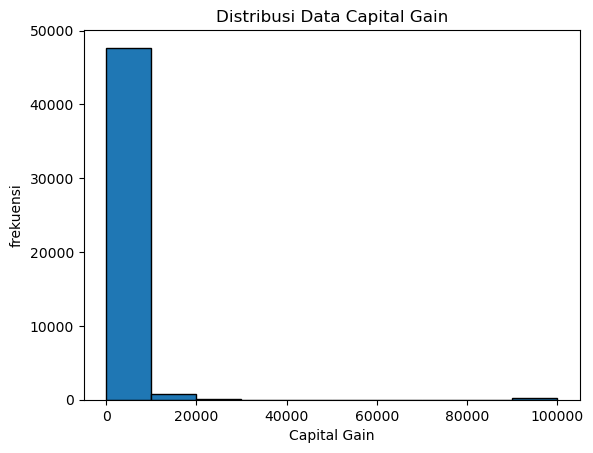

In [30]:
#menggunakan histogram untuk memeriksa kembali values pada kolom Capital Gain
#plt.hist(data=df,x='Capital gain')
#plt.title('Jumlah Penduduk berdasarkan Capital gain')

plt.hist(df['Capital Gain'],edgecolor='black')
plt.xlabel('Capital Gain')
plt.ylabel('frekuensi')
plt.title('Distribusi Data Capital Gain')
plt.show()
plt.show()

In [31]:
#Memeriksa persentase dari values 0 di capital gain
len1 = round((len(df[df['Capital Gain']== 0])/len(df)*100),2)
print(len1,"%")

91.73 %


Karena hampir 92% values pada kolom Capital Gain adalah 0, maka untuk menghindari bias pada saat melakukan modelling maka kolom ini kita hapus.

In [32]:
#menghapus kolom Capital Gain dari Dataframe
df.drop(columns='Capital Gain', inplace=True)

C:\Users\Inne Andarini\AppData\Local\Temp\ipykernel_20048\2784390103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Capital Gain', inplace=True)


In [33]:
df.head(3)

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,40,USA,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,USA,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,USA,<=50K


### 2.5.2 Kolom Capital Loss (Menghapus kolom capital loss)

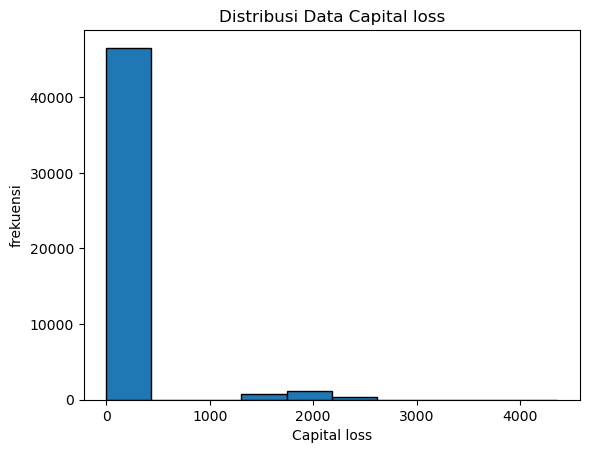

In [34]:
#menggunakan histogram untuk memeriksa kembali values pada kolom capital loss
#plt.hist(data=df,x='Capital loss')
#plt.title('Jumlah Penduduk berdasarkan Capital loss')

plt.hist(df['capital loss'],edgecolor='black')
plt.xlabel('Capital loss')
plt.ylabel('frekuensi')
plt.title('Distribusi Data Capital loss')
plt.show()

In [35]:
#Memeriksa persentase dari values 0 di capital loss
len2 = round((len(df[df['capital loss']== 0])/len(df)*100),2)
print(len2,"%")

95.32 %


Karena lebih dari 95% values pada kolom capital loss adalah 0, maka untuk menghindari bias pada saat melakukan modelling maka kolom ini kita hapus.

In [36]:
#menghapus kolom Capital Loss dari Dataframe
df.drop(columns='capital loss', inplace=True)

C:\Users\Inne Andarini\AppData\Local\Temp\ipykernel_20048\975939104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='capital loss', inplace=True)


In [37]:
df.head(3)

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,USA,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,USA,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,USA,<=50K


### 2.5.3 Kolom Native Country

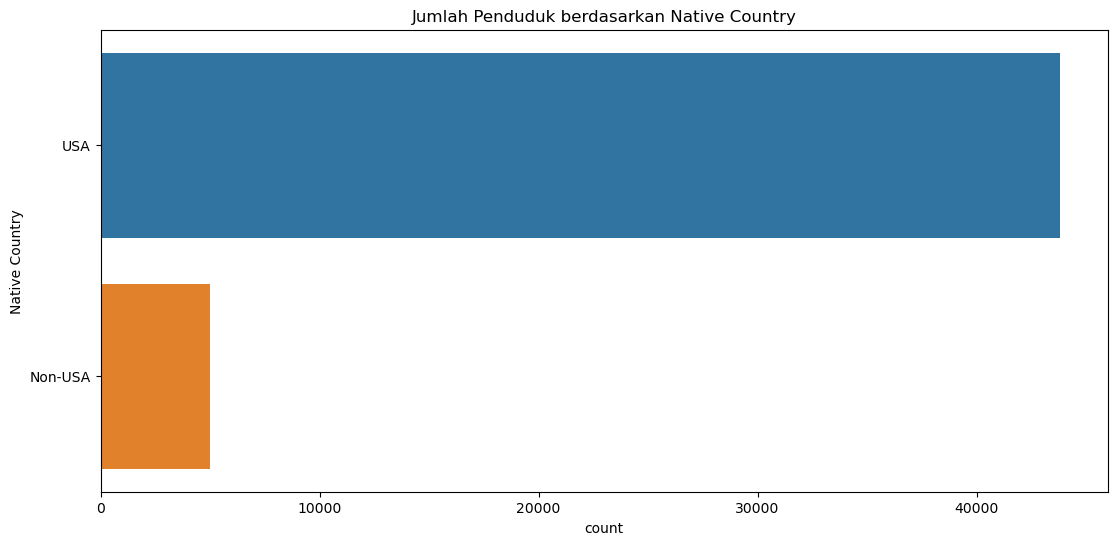

In [38]:
#menggunakan countplot untuk memeriksa kembali values pada kolom Native Country
plt.figure(figsize=(13,6))
sns.countplot(data=df,y='Native Country')
plt.title('Jumlah Penduduk berdasarkan Native Country')
#plt.xticks(rotation=75)
plt.show()

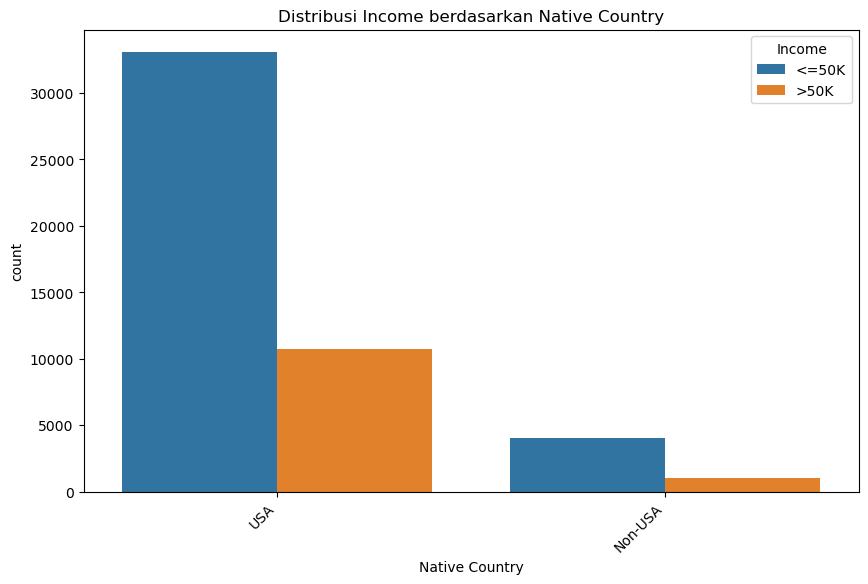

In [39]:
#Visualisasi Distribusi income berdasarkan Native Country
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='Native Country', hue='Income', data=df)
plt.title('Distribusi Income berdasarkan Native Country')

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [40]:
#Memeriksa values kolom Native Country
df['Native Country'].value_counts()

Native Country
USA        43809
Non-USA     5003
Name: count, dtype: int64

In [41]:
#Memeriksa persentase dari values 0 di capital gain
len3 = round((len(df[df['Native Country'] == 'USA'])/len(df)*100),2)
print(len3,"%")

89.75 %


hampir 90% penduduk Amerika adalah Berkebangsaan asli United-States.

### 2.5.4 Kolom Education dan EducationNum (menghapus kolom education)

In [42]:
#Mengurutkan data Education dan EducationNum berdasarkan countnya
Education_data=df['Education'].value_counts()
order1= list(Education_data.index)

EducationNum_data=df['EducationNum'].value_counts()
order2= list(EducationNum_data.index)

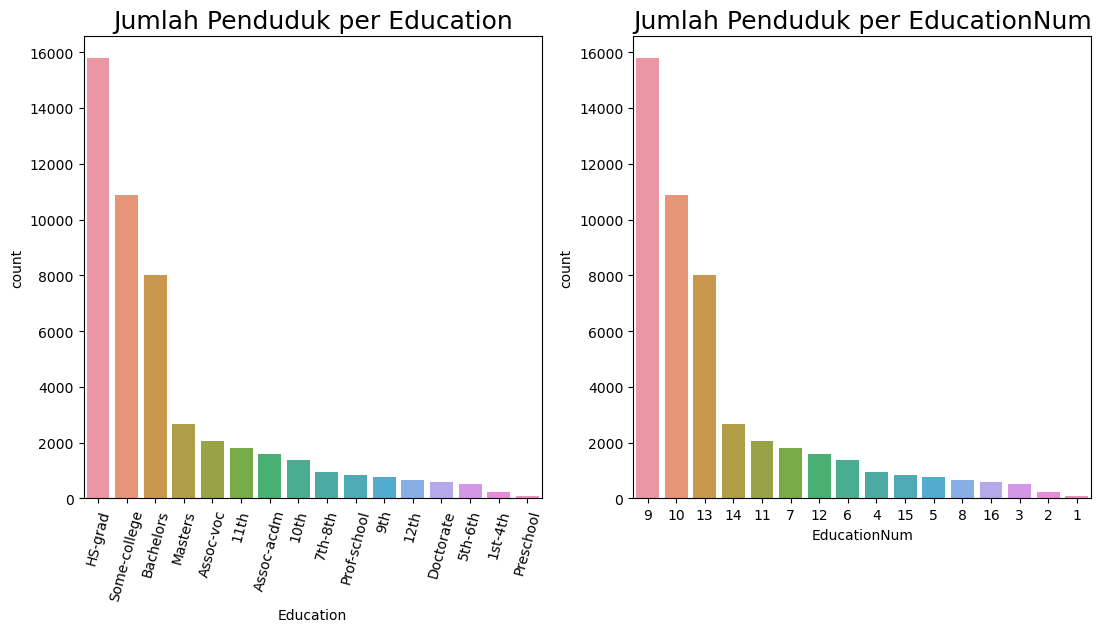

In [43]:
plt.figure(figsize=(13,6))

# Plot the count bar plot
plt.subplot(1,2,1)
plot1= sns.countplot(data=df, x='Education', order=order1)
plt.title('Jumlah Penduduk per Education', fontsize=18)
plt.xticks(rotation=75);

plt.subplot(1,2,2)
plot2= sns.countplot(data=df, x='EducationNum', order=order2)
plt.title('Jumlah Penduduk per EducationNum', fontsize=18);

In [44]:
#Memeriksa multikolineritas
edu = df[['Education','EducationNum']]

In [45]:
# Mendefinisikan pemetaan manual dari nilai kategori ke nilai numerik
education_mapping = {
    'Preschool': 1,
    '1st-4th': 2,
    '5th-6th': 3,
    '7th-8th': 4,
    '9th': 5,
    '10th': 6,
    '11th': 7,
    '12th': 8,
    'HS-grad': 9,
    'Some-college': 10,
    'Assoc-voc' : 11,
    'Assoc-acdm': 12,
    'Bachelors': 13,
    'Masters': 14,
    'Prof-school': 15,
    'Doctorate':16
}

# Melakukan label encoding pada kolom 'Education' menggunakan pemetaan manual
edu['Education_Label'] = edu['Education'].map(education_mapping)

# Menampilkan DataFrame setelah label encoding
print(edu)


       Education  EducationNum  Education_Label
0      Bachelors            13               13
1      Bachelors            13               13
2        HS-grad             9                9
3           11th             7                7
4      Bachelors            13               13
...          ...           ...              ...
16275  Bachelors            13               13
16276    HS-grad             9                9
16277  Bachelors            13               13
16278  Bachelors            13               13
16279  Bachelors            13               13

[48812 rows x 3 columns]


C:\Users\Inne Andarini\AppData\Local\Temp\ipykernel_20048\767943053.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu['Education_Label'] = edu['Education'].map(education_mapping)


**Uji Multikolineritas untuk kolom Education(Numerik) dan EducationNum**

In [46]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Misalkan df adalah DataFrame Anda dengan dua kolom yang ingin diuji
# Gantilah 'df' dengan nama DataFrame yang sesuai dengan struktur data Anda

# Pilih dua kolom yang ingin diuji multikolineritasnya
selected_columns = ['EducationNum', 'Education_Label']

# Buat DataFrame baru hanya dengan dua kolom yang dipilih
selected_df = edu[selected_columns]

# Tambahkan kolom konstanta untuk estimasi intercept dalam perhitungan VIF
selected_df['Intercept'] = 1.0

# Hitung VIF untuk setiap variabel
vif_data = pd.DataFrame()
vif_data["Variable"] = selected_df.columns
vif_data["VIF"] = [variance_inflation_factor(selected_df.values, i) for i in range(selected_df.shape[1])]

# Tampilkan hasil VIF
print(vif_data)


          Variable        VIF
0     EducationNum        inf
1  Education_Label        inf
2        Intercept  16.377058


C:\Users\Inne Andarini\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Nilai "inf" pada kolom VIF menunjukkan bahwa ada indikasi kuat terjadinya masalah multikolineritas, tetapi juga menunjukkan bahwa variabel tersebut mungkin terkorelasi secara sempurna dengan variabel lainnya. Artinya variabel
Education dapat sepenuhnya dijelaskan oleh variabel EducationNum.

Karena adanya masalah multikolineritas tersebut, maka hanya perlu satu kolom saja untuk dimasukkan ke model ML. Kolom EducationNum dipilih karena sudah berbentuk data numerikal, tidak perlu encoding.

In [47]:
#Menghapus kolom Education
df.drop(columns='Education', inplace=True)

C:\Users\Inne Andarini\AppData\Local\Temp\ipykernel_20048\1636540353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Education', inplace=True)


In [48]:
df.head()

,Age,Workclass,Final Weight,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Hours per Week,Native Country,Income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,USA,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,USA,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,USA,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,USA,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Non-USA,<=50K


### 2.5.5 Kolom Marital Status (mengelompokkan beberapa values)

In [49]:
df['Marital Status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

Untuk memudahkan pengelompokan, maka beberapa values pada kolom Marital Status perlu di gabungkan.

In [50]:
df["Marital Status"] = df["Marital Status"].replace(['Divorced','Separated', 'Widowed'], "Divorced")

C:\Users\Inne Andarini\AppData\Local\Temp\ipykernel_20048\3688793882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Marital Status"] = df["Marital Status"].replace(['Divorced','Separated', 'Widowed'], "Divorced")


In [51]:
df["Marital Status"] = df["Marital Status"].replace(['Married-civ-spouse','Married-spouse-absent', 'Married-AF-spouse'], "Married")

C:\Users\Inne Andarini\AppData\Local\Temp\ipykernel_20048\861222737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Marital Status"] = df["Marital Status"].replace(['Married-civ-spouse','Married-spouse-absent', 'Married-AF-spouse'], "Married")


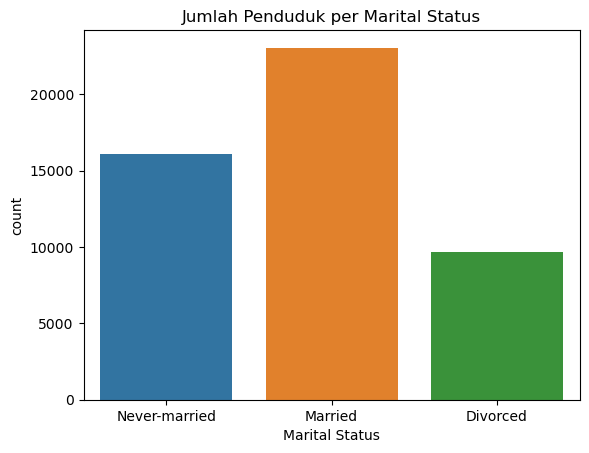

In [52]:
#menggunakan countplot untuk memeriksa kembali values pada kolom Marital Status
#plt.figure(figsize=(13,6))
sns.countplot(data=df,x='Marital Status')
plt.title('Jumlah Penduduk per Marital Status')
plt.show()

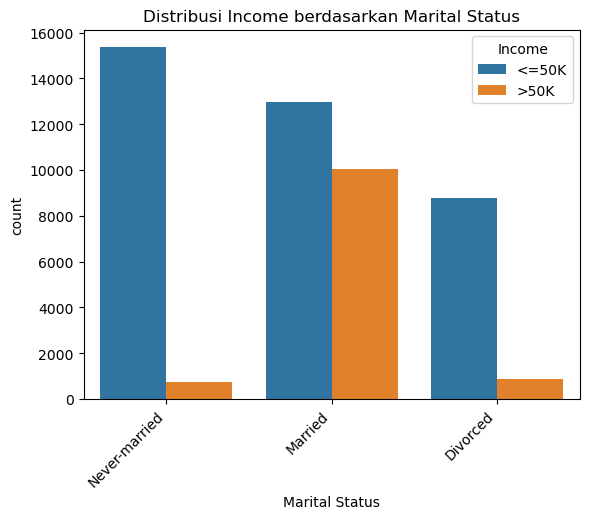

In [53]:
#Visualiasi Distribusi income berdasarkan Marital status
#plt.figure(figsize=(10, 6))
plot = sns.countplot(x='Marital Status', hue='Income', data=df)
plt.title('Distribusi Income berdasarkan Marital Status')

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

### 2.5.6 Kolom Relationship

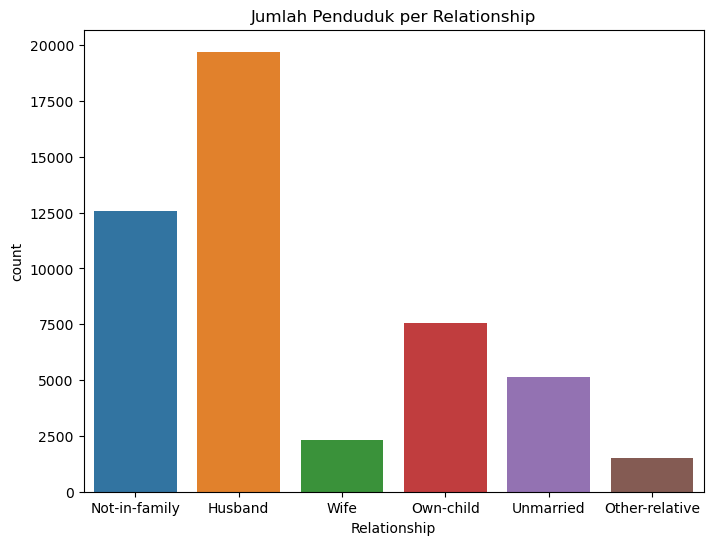

In [54]:
#menggunakan countplot untuk memeriksa kembali values pada kolom Race
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Relationship')
plt.title('Jumlah Penduduk per Relationship')
plt.show()

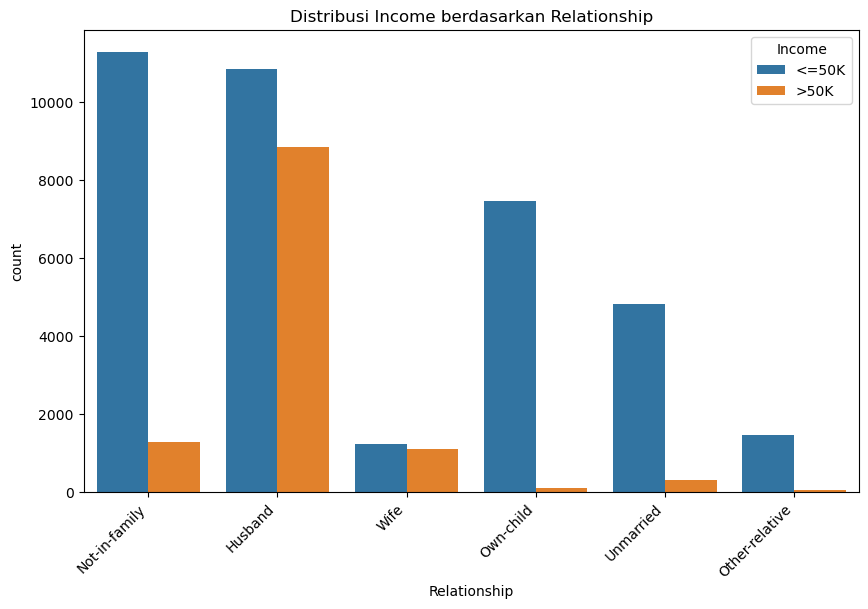

In [55]:
#Visualisasi Distribusi income berdasarkan relationship
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='Relationship', hue='Income', data=df)
plt.title('Distribusi Income berdasarkan Relationship')

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

### 2.5.7 Kolom Race (menyederhanakan value menjadi White dan Non-White)

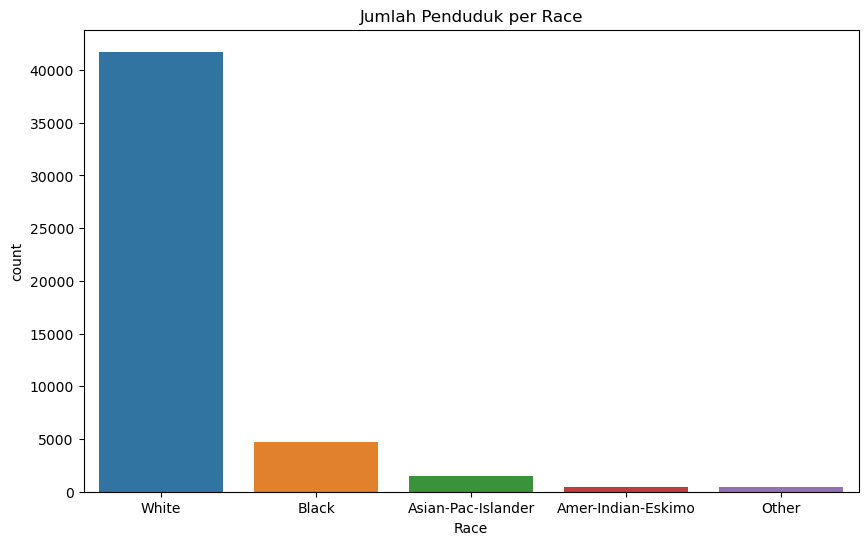

In [56]:
#menggunakan countplot untuk memeriksa kembali values pada kolom Race
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Race')
plt.title('Jumlah Penduduk per Race')
plt.show()

C:\Users\Inne Andarini\AppData\Local\Temp\ipykernel_20048\1403907894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Race"] = np.where(df["Race"]=='White', 'White', 'Non-White')


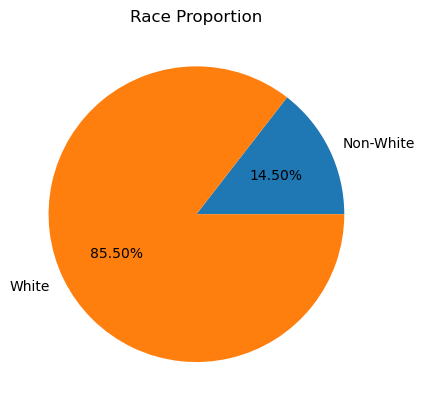

In [57]:
# Simplify Race
df["Race"] = np.where(df["Race"]=='White', 'White', 'Non-White')

Race = df.groupby(["Race"]).size()

plt.title('Race Proportion')
plt.pie(Race, labels=Race.index, autopct=lambda p: f'{p:.2f}%')
plt.show();

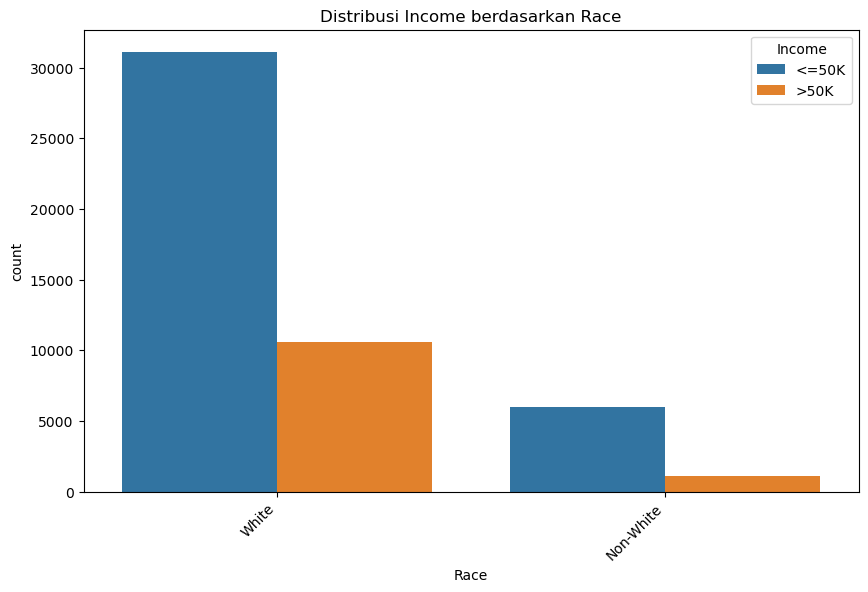

In [58]:
#Visualisasi Distribusi income berdasarkan Race
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='Race', hue='Income', data=df)
plt.title('Distribusi Income berdasarkan Race')

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

### 2.5.8 Kolom Gender

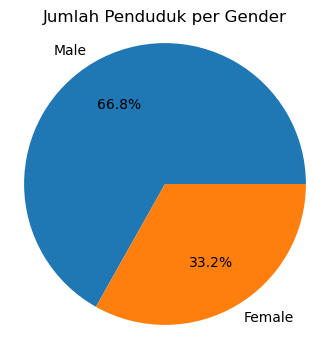

In [59]:
# Menghitung jumlah masing-masing nilai dalam 'Gender'
Gender = df['Gender'].value_counts()

# Membuat pie chart
plt.figure(figsize=(4, 4))
plt.pie(Gender, labels=Gender.index, autopct='%1.1f%%', pctdistance=0.65)

# Menambahkan judul
plt.title('Jumlah Penduduk per Gender')

plt.axis('equal')  # Agar tampilan proporsional
plt.show()

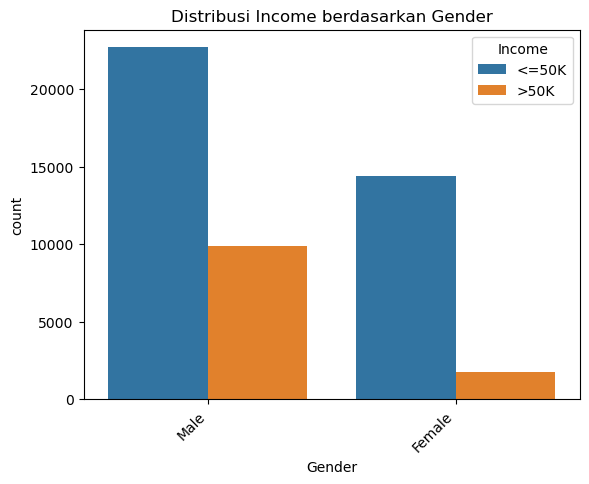

In [60]:
#Visualisasi Distribusi income berdasarkan gender
#plt.figure(figsize=(10, 6))
plot = sns.countplot(x='Gender', hue='Income', data=df)
plt.title('Distribusi Income berdasarkan Gender')

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

### 2.5.9 Kolom Workclass

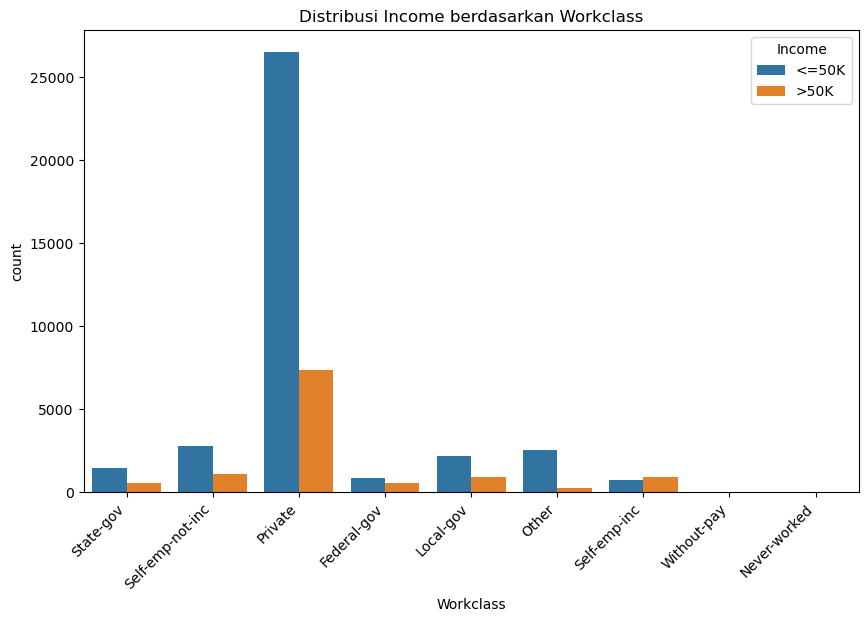

In [61]:
#Visualisasi kolom Workclass
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='Workclass', hue='Income', data=df)
plt.title('Distribusi Income berdasarkan Workclass')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [62]:
distribution = pd.crosstab(df['Workclass'], df['Income'])
distribution.sort_values(by='<=50K', ascending=False)

Income,<=50K,>50K
Workclass,,
Private,26493,7385
Self-emp-not-inc,2784,1077
Other,2534,265
Local-gov,2209,927
State-gov,1451,530
Federal-gov,871,561
Self-emp-inc,756,938
Without-pay,19,2
Never-worked,10,0


### 2.5.10 Kolom Occupation

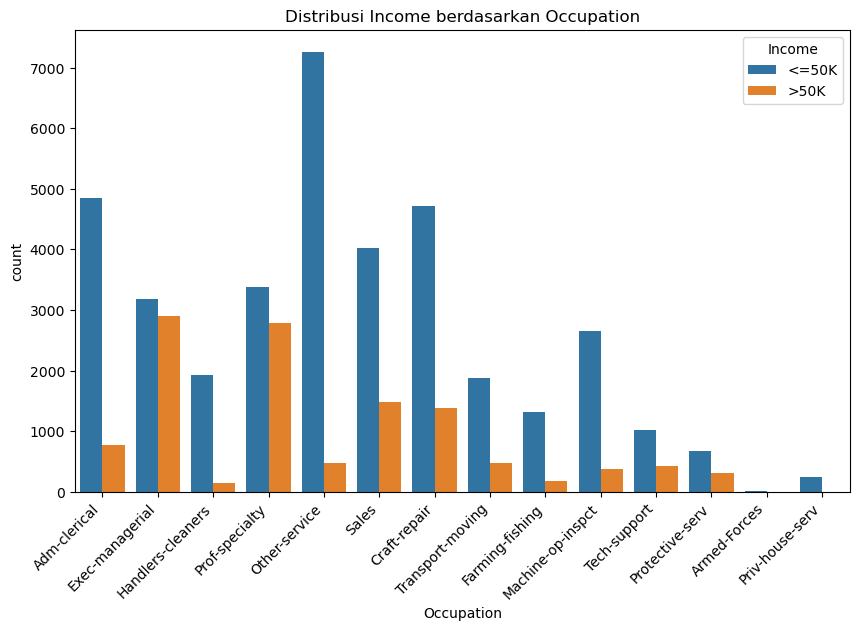

In [63]:
#Visualisai Distribusi income berdasarkan occupation
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='Occupation', hue='Income', data=df)
plt.title('Distribusi Income berdasarkan Occupation')

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

### 2.5.11 Kolom Numeric (Age, Final Weight, EducationNum, Hours per Week)

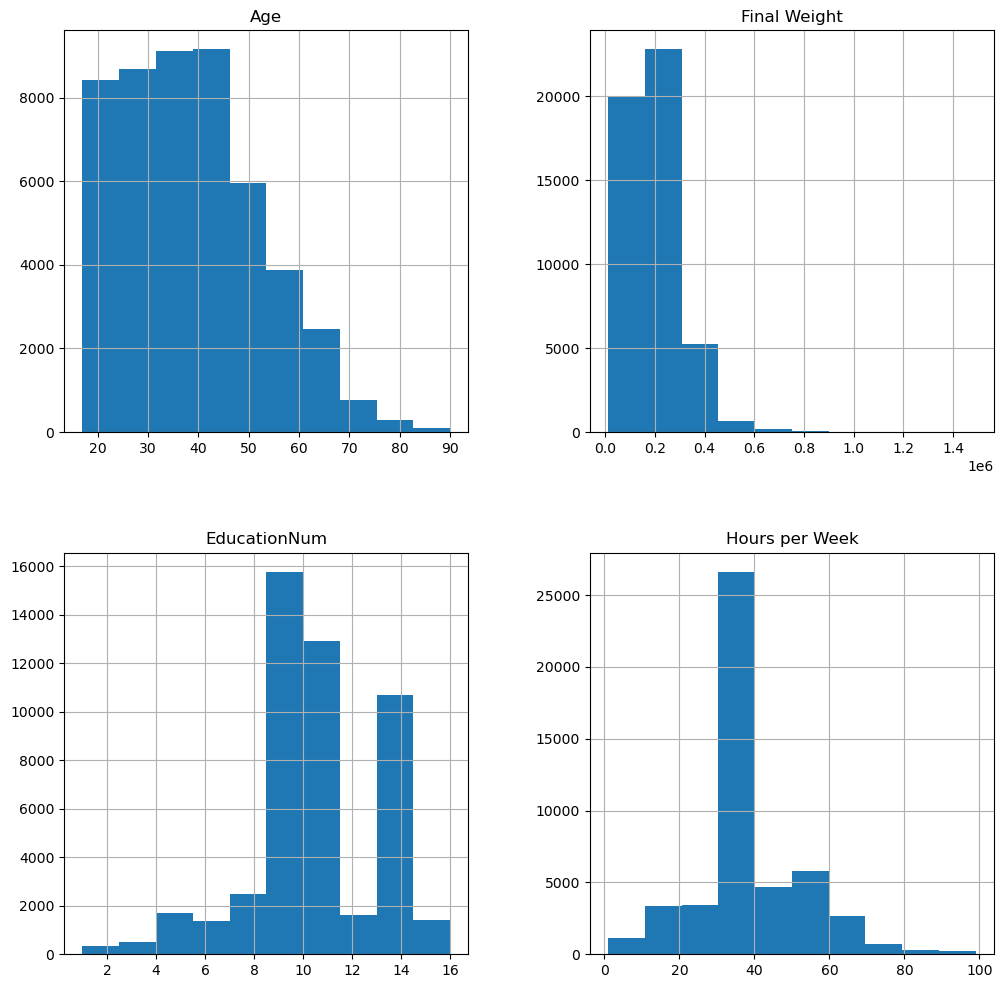

In [64]:
#To find the distributions and outlier in the each feature
df.hist(figsize=(12,12))
plt.show()

In [65]:
df

,Age,Workclass,Final Weight,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Hours per Week,Native Country,Income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,USA,<=50K
1,50,Self-emp-not-inc,83311,13,Married,Exec-managerial,Husband,White,Male,13,USA,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,USA,<=50K
3,53,Private,234721,7,Married,Handlers-cleaners,Husband,Non-White,Male,40,USA,<=50K
4,28,Private,338409,13,Married,Prof-specialty,Wife,Non-White,Female,40,Non-USA,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,36,USA,<=50K
16276,64,Other,321403,9,Divorced,Other-service,Other-relative,Non-White,Male,40,USA,<=50K
16277,38,Private,374983,13,Married,Prof-specialty,Husband,White,Male,50,USA,<=50K
16278,44,Private,83891,13,Divorced,Adm-clerical,Own-child,Non-White,Male,40,USA,<=50K


### 2.5.12 Memeriksa dan Memperbaiki data outlier

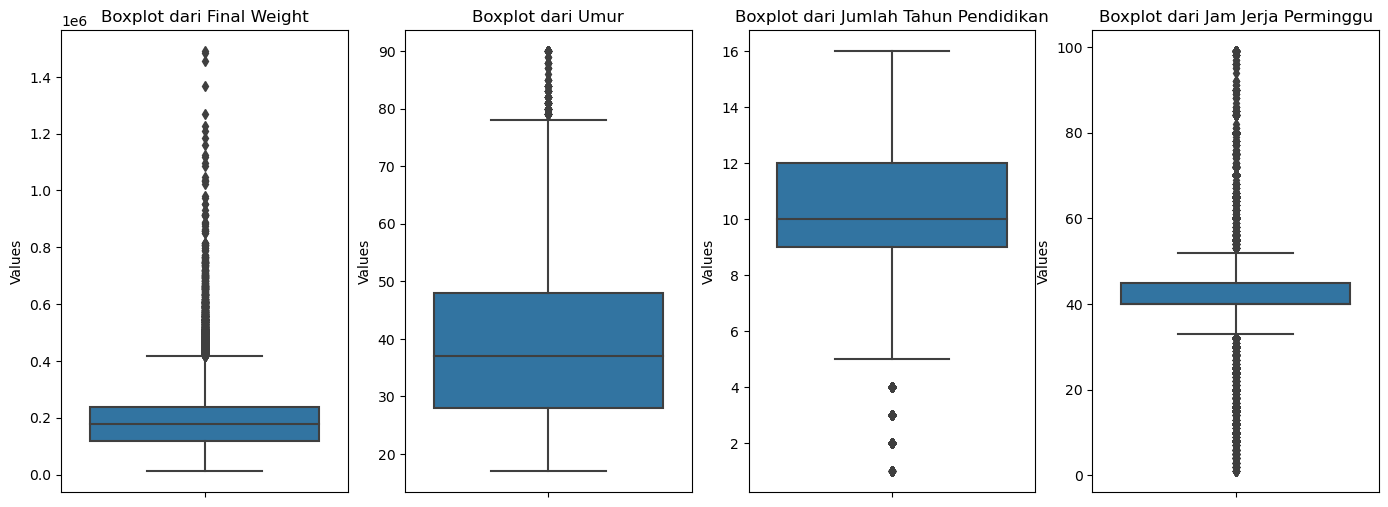

In [66]:
#memeriksa outlier pada final weight dengan boxplot
plt.figure(figsize=(17, 6))
plt.subplot(1,4,1)
sns.boxplot(y=df['Final Weight'])
plt.title('Boxplot dari Final Weight')
plt.ylabel('Values')

plt.subplot(1,4,2)
sns.boxplot(y=df['Age'])
plt.title('Boxplot dari Umur')
plt.ylabel('Values')

plt.subplot(1,4,3)
sns.boxplot(y=df['EducationNum'])
plt.title('Boxplot dari Jumlah Tahun Pendidikan')
plt.ylabel('Values')

plt.subplot(1,4,4)
sns.boxplot(y=df['Hours per Week'])
plt.title('Boxplot dari Jam Jerja Perminggu')
plt.ylabel('Values')

plt.show()

In [67]:
print('Jumlah baris yang mengalami outlier:')

for kolom in (df):
  if df[kolom].dtype == 'int64':
    # Calculate the IQR
    q1 = np.percentile(df[kolom], 25)
    q3 = np.percentile(df[kolom], 75)
    iqr = q3 - q1
    # Find outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[kolom][(df[kolom] < lower_bound) | (df[kolom] > upper_bound)].count()
    print(kolom, '=', outliers)

Jumlah baris yang mengalami outlier:
Age = 215
Final Weight = 1453
EducationNum = 1789
Hours per Week = 13489


In [68]:
# Calculate the IQR
q1 = np.percentile(df["Final Weight"], 25)
q3 = np.percentile(df["Final Weight"], 75)
iqr = q3 - q1
# Find outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df["Final Weight"][(df["Final Weight"] < lower_bound) | (df["Final Weight"] > upper_bound)]
print(outliers)

37       544091
40       507875
80       446839
110      432376
157      494223
          ...  
16115    427515
16172    607658
16178    422933
16259    430340
16271    440129
Name: Final Weight, Length: 1453, dtype: int64


In [69]:
outliers.count()

1453

Terdapat 1453 baris pada kolom final weight yang tergolong outlier

In [70]:
#Mengatasi outlier dengan menggunakan cap method
# Cap outliers using the IQR method
df['Final Weight'] = np.clip(df['Final Weight'], lower_bound, upper_bound)

C:\Users\Inne Andarini\AppData\Local\Temp\ipykernel_20048\4213289972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Final Weight'] = np.clip(df['Final Weight'], lower_bound, upper_bound)


In [71]:
df['Final Weight'] = df['Final Weight'].astype(int)

C:\Users\Inne Andarini\AppData\Local\Temp\ipykernel_20048\386088164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Final Weight'] = df['Final Weight'].astype(int)


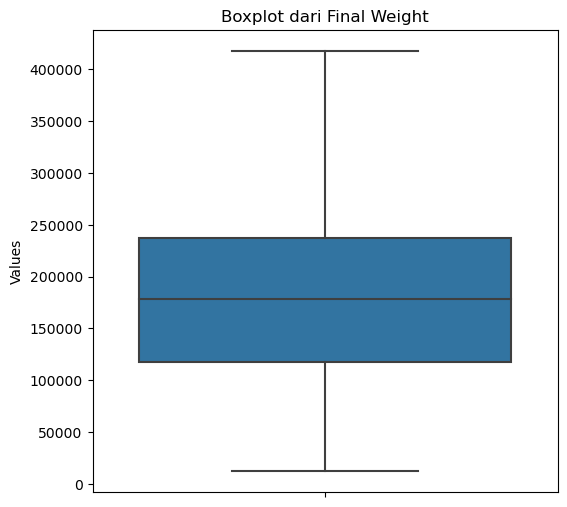

In [72]:
#memeriksa outlier pada final weight dengan boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['Final Weight'])
plt.title('Boxplot dari Final Weight')
plt.ylabel('Values')
plt.show()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48812 entries, 0 to 16279
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48812 non-null  int64 
 1   Workclass       48812 non-null  object
 2   Final Weight    48812 non-null  int32 
 3   EducationNum    48812 non-null  int64 
 4   Marital Status  48812 non-null  object
 5   Occupation      48812 non-null  object
 6   Relationship    48812 non-null  object
 7   Race            48812 non-null  object
 8   Gender          48812 non-null  object
 9   Hours per Week  48812 non-null  int64 
 10  Native Country  48812 non-null  object
 11  Income          48812 non-null  object
dtypes: int32(1), int64(3), object(8)
memory usage: 4.7+ MB


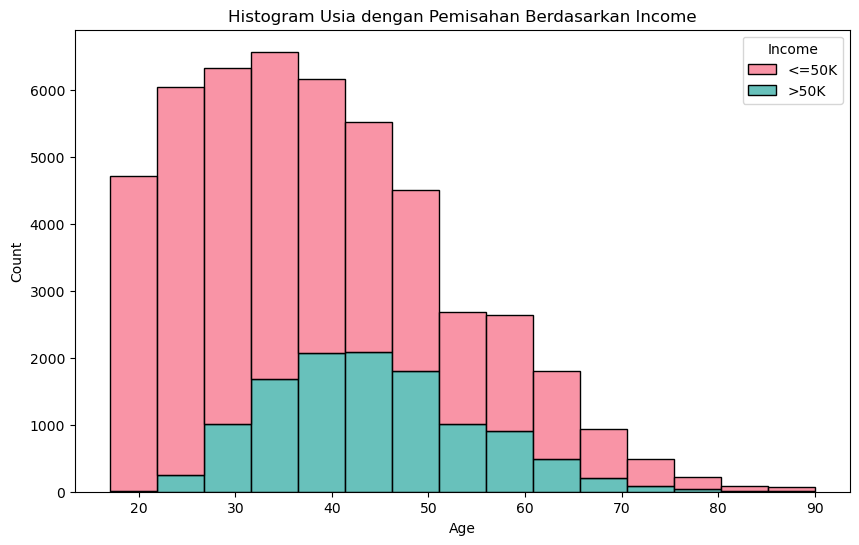

In [74]:
#hubungan variable numeric dengan kategori income
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Income', bins=15, multiple='stack', palette='husl')
plt.title('Histogram Usia dengan Pemisahan Berdasarkan Income')
plt.show()

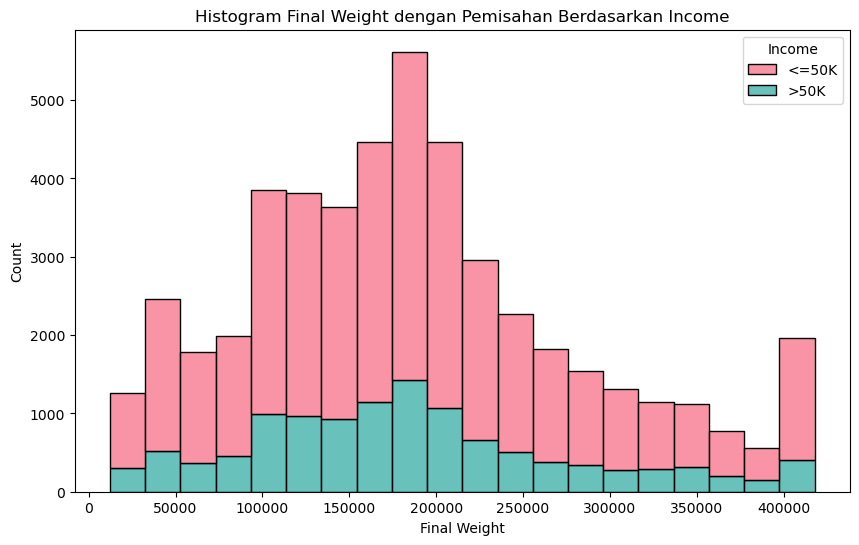

In [75]:
#hubungan variable numeric dengan kategori income
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Final Weight', hue='Income', bins=20, multiple='stack', palette='husl')
plt.title('Histogram Final Weight dengan Pemisahan Berdasarkan Income')
plt.show()

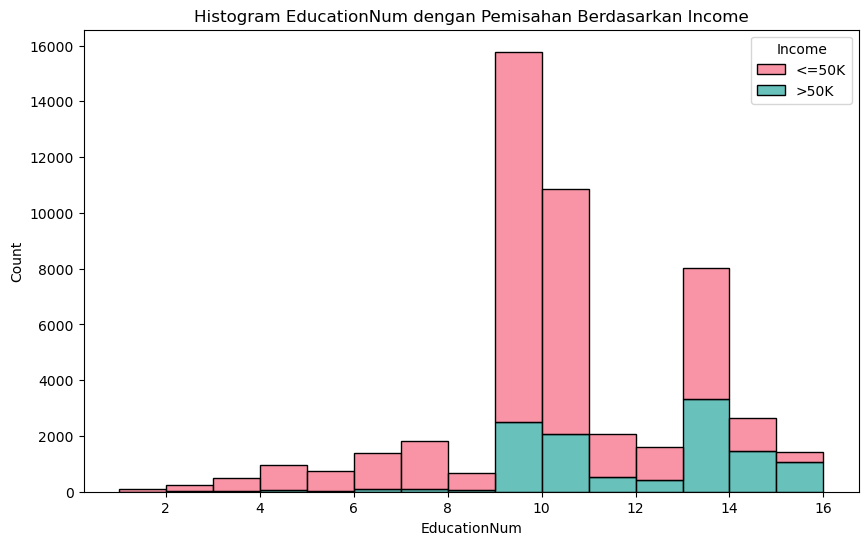

In [76]:
#hubungan variable numeric dengan kategori income
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='EducationNum', hue='Income', bins=15, multiple='stack', palette='husl')
plt.title('Histogram EducationNum dengan Pemisahan Berdasarkan Income')
plt.show()

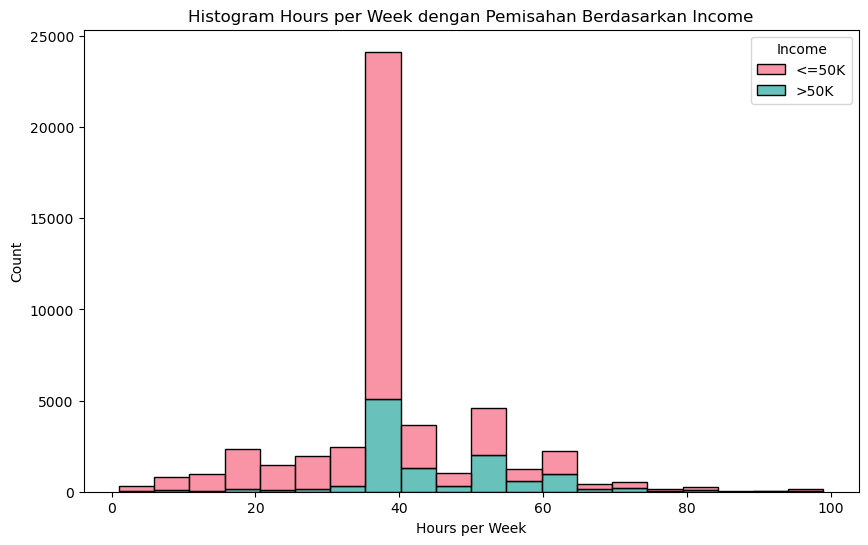

In [77]:
#hubungan variable numeric dengan kategori income
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Hours per Week', hue='Income', bins=20, multiple='stack', palette='husl')
plt.title('Histogram Hours per Week dengan Pemisahan Berdasarkan Income')
plt.show()

# **3. Data Preprocessing**

### 3.1 Data encoding

In [78]:
df3=df.copy()

In [79]:
df3

,Age,Workclass,Final Weight,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Hours per Week,Native Country,Income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,USA,<=50K
1,50,Self-emp-not-inc,83311,13,Married,Exec-managerial,Husband,White,Male,13,USA,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,USA,<=50K
3,53,Private,234721,7,Married,Handlers-cleaners,Husband,Non-White,Male,40,USA,<=50K
4,28,Private,338409,13,Married,Prof-specialty,Wife,Non-White,Female,40,Non-USA,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,36,USA,<=50K
16276,64,Other,321403,9,Divorced,Other-service,Other-relative,Non-White,Male,40,USA,<=50K
16277,38,Private,374983,13,Married,Prof-specialty,Husband,White,Male,50,USA,<=50K
16278,44,Private,83891,13,Divorced,Adm-clerical,Own-child,Non-White,Male,40,USA,<=50K


In [80]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48812 entries, 0 to 16279
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48812 non-null  int64 
 1   Workclass       48812 non-null  object
 2   Final Weight    48812 non-null  int32 
 3   EducationNum    48812 non-null  int64 
 4   Marital Status  48812 non-null  object
 5   Occupation      48812 non-null  object
 6   Relationship    48812 non-null  object
 7   Race            48812 non-null  object
 8   Gender          48812 non-null  object
 9   Hours per Week  48812 non-null  int64 
 10  Native Country  48812 non-null  object
 11  Income          48812 non-null  object
dtypes: int32(1), int64(3), object(8)
memory usage: 4.7+ MB


In [81]:
#income di ubah ke 0 dan 1
from sklearn.preprocessing import LabelEncoder

def label_encoder(dataframe, binary_col):
    encoders = {}  # untuk menyimpan objek encoder untuk kolom-kolom yang di-encode
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    encoders[binary_col] = labelencoder  # Save the encoder for future use
    return dataframe, encoders

# Example usage:
# Replace 'df3' with your actual DataFrame and 'Income' with the binary column you want to encode.
df3, encoders = label_encoder(df3, 'Income')

# Display the transformed DataFrame
print(df3)

# To use the encoder later:
# encoded_values = encoders['Income'].transform(some_values)

       Age         Workclass  Final Weight  EducationNum Marital Status  \
0       39         State-gov         77516            13  Never-married   
1       50  Self-emp-not-inc         83311            13        Married   
2       38           Private        215646             9       Divorced   
3       53           Private        234721             7        Married   
4       28           Private        338409            13        Married   
...    ...               ...           ...           ...            ...   
16275   39           Private        215419            13       Divorced   
16276   64             Other        321403             9       Divorced   
16277   38           Private        374983            13        Married   
16278   44           Private         83891            13       Divorced   
16279   35      Self-emp-inc        182148            13        Married   

              Occupation    Relationship       Race  Gender  Hours per Week  \
0           Adm-cler

In [82]:
df3

,Age,Workclass,Final Weight,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Hours per Week,Native Country,Income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,USA,0
1,50,Self-emp-not-inc,83311,13,Married,Exec-managerial,Husband,White,Male,13,USA,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,USA,0
3,53,Private,234721,7,Married,Handlers-cleaners,Husband,Non-White,Male,40,USA,0
4,28,Private,338409,13,Married,Prof-specialty,Wife,Non-White,Female,40,Non-USA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,36,USA,0
16276,64,Other,321403,9,Divorced,Other-service,Other-relative,Non-White,Male,40,USA,0
16277,38,Private,374983,13,Married,Prof-specialty,Husband,White,Male,50,USA,0
16278,44,Private,83891,13,Divorced,Adm-clerical,Own-child,Non-White,Male,40,USA,0


In [83]:
df3 = pd.get_dummies(df3, drop_first=True) # one hot encoding untuk fitur kategorikal di dataset
print(df3.shape)

(48812, 36)


In [84]:
df3

,Age,Final Weight,EducationNum,Hours per Week,Income,Workclass_Local-gov,Workclass_Never-worked,Workclass_Other,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Marital Status_Married,Marital Status_Never-married,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_White,Gender_Male,Native Country_USA
0,39,77516,13,40,0,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True
1,50,83311,13,13,0,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
2,38,215646,9,40,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True
3,53,234721,7,40,0,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,28,338409,13,40,0,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,215419,13,36,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True
16276,64,321403,9,40,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
16277,38,374983,13,50,0,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,True
16278,44,83891,13,40,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True


In [85]:
final_test = df3.drop(columns="Income")
encoding_columns = final_test.columns #Simpan kolom2 hasil encoding untuk digunakan nanti

### 3.2  Generate training and test datasets of dependent and independent variables

In [86]:
df4=df3.copy()

In [87]:
target = df4["Income"]

df4 = df4.drop(columns="Income")

In [88]:
df4

,Age,Final Weight,EducationNum,Hours per Week,Workclass_Local-gov,Workclass_Never-worked,Workclass_Other,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Marital Status_Married,Marital Status_Never-married,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_White,Gender_Male,Native Country_USA
0,39,77516,13,40,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True
1,50,83311,13,13,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
2,38,215646,9,40,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True
3,53,234721,7,40,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,28,338409,13,40,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,215419,13,36,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True
16276,64,321403,9,40,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
16277,38,374983,13,50,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,True
16278,44,83891,13,40,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True


In [89]:
X_train, X_test, y_train, y_test = train_test_split(df4, target,
                                                    stratify=target, # supaya ratio value di data training dan test sama
                                                    test_size = 0.2, #use 0.1 if data is huge.
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.

print("Dimensi X_train dataset: ", X_train.shape)
print("Dimensi y_train dataset: ", y_train.shape)
print("Dimensi X_test dataset: ", X_test.shape)
print("Dimensi y_test dataset: ", y_test.shape)

Dimensi X_train dataset:  (39049, 35)
Dimensi y_train dataset:  (39049,)
Dimensi X_test dataset:  (9763, 35)
Dimensi y_test dataset:  (9763,)


In [90]:
X_train

,Age,Final Weight,EducationNum,Hours per Week,Workclass_Local-gov,Workclass_Never-worked,Workclass_Other,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Marital Status_Married,Marital Status_Never-married,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_White,Gender_Male,Native Country_USA
29265,36,148581,9,55,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
3249,40,227823,12,70,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
31055,54,222882,9,45,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True
14883,48,193775,13,38,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True
3846,29,57596,10,40,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20411,48,246891,15,60,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
15606,49,243190,11,40,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,True
2274,48,119565,9,40,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
12802,17,117549,6,12,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True


In [91]:
X_test

,Age,Final Weight,EducationNum,Hours per Week,Workclass_Local-gov,Workclass_Never-worked,Workclass_Other,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Marital Status_Married,Marital Status_Never-married,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_White,Gender_Male,Native Country_USA
6286,24,138938,10,40,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True
11843,35,261646,9,40,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
7719,23,239539,10,40,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
25713,32,183304,11,99,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True
19370,55,101468,9,40,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,35,179579,14,48,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
5432,29,176137,9,40,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True
394,37,79586,9,60,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True
7065,24,161092,13,40,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True


### 3.3 Feature Scaling

In [92]:
from sklearn.preprocessing import RobustScaler
sc_X = RobustScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

Fitur-fitur di-scaling menggunakan robust scaler karena lebih tahan terhadap outlier dan cocok untuk data yang tidak terdistribusi normal



In [93]:
y_train

29265    1
3249     0
31055    0
14883    1
3846     0
        ..
20411    0
15606    0
2274     0
12802    0
6926     1
Name: Income, Length: 39049, dtype: int32

In [94]:
X_train

,Age,Final Weight,EducationNum,Hours per Week,Workclass_Local-gov,Workclass_Never-worked,Workclass_Other,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Marital Status_Married,Marital Status_Never-married,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_White,Gender_Male,Native Country_USA
29265,-0.05,-0.247711,-0.333333,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3249,0.15,0.410785,0.666667,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
31055,0.85,0.369725,-0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0
14883,0.55,0.127848,1.000000,-0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3846,-0.40,-1.003789,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20411,0.55,0.569238,1.666667,4.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15606,0.60,0.538483,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2274,0.55,-0.488831,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12802,-1.00,-0.505584,-1.333333,-5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,-1.0,0.0


In [95]:
X_test

,Age,Final Weight,EducationNum,Hours per Week,Workclass_Local-gov,Workclass_Never-worked,Workclass_Other,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Marital Status_Married,Marital Status_Never-married,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_White,Gender_Male,Native Country_USA
6286,-0.65,-0.327843,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
11843,-0.10,0.691851,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7719,-0.70,0.508144,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,-1.0
25713,-0.25,0.040835,0.333333,11.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19370,0.90,-0.639216,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,-0.10,0.009881,1.333333,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5432,-0.40,-0.018722,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0
394,0.00,-0.821054,-0.333333,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0
7065,-0.65,-0.143745,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# **4. Data Model Training**

### 4.1 Model Selection

In [96]:
!pip install xgboost

In [97]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  # Add this line
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd


In [ ]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))

models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))

models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))

models.append(('Gaussian NB', GaussianNB()))

models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))

models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))

models.append(('XGBoost', XGBClassifier()))

#Evaluating Model Results:


acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=5)  # 5-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

catatan: semakin nilai AUC-ROC mendekati nilai 1, maka semakin bagus model dalam membedakan class target variabel

(array([0.625, 0.65 , 0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825,
        0.85 , 0.875]),
 [Text(0, 0.625, '0.625'),
  Text(0, 0.65, '0.650'),
  Text(0, 0.675, '0.675'),
  Text(0, 0.7, '0.700'),
  Text(0, 0.725, '0.725'),
  Text(0, 0.75, '0.750'),
  Text(0, 0.775, '0.775'),
  Text(0, 0.8, '0.800'),
  Text(0, 0.825, '0.825'),
  Text(0, 0.85, '0.850'),
  Text(0, 0.875, '0.875')])

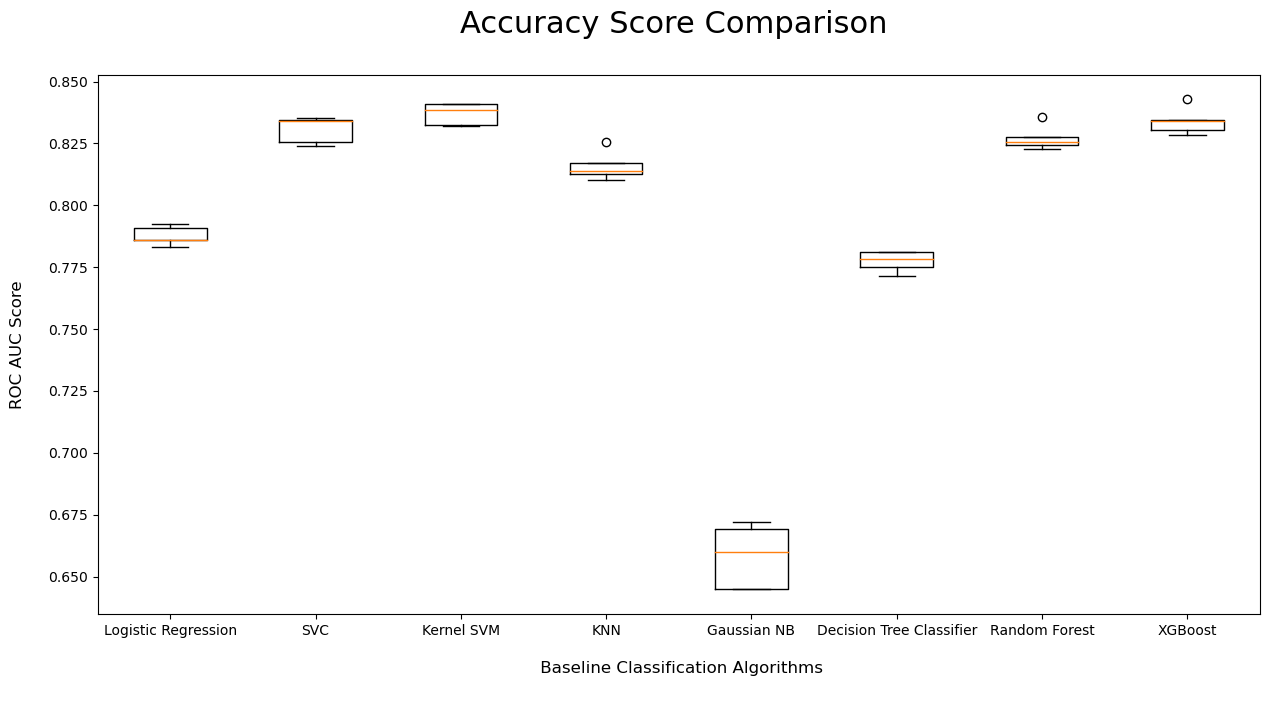

In [99]:
#Using Accuracy Mean:

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)



plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

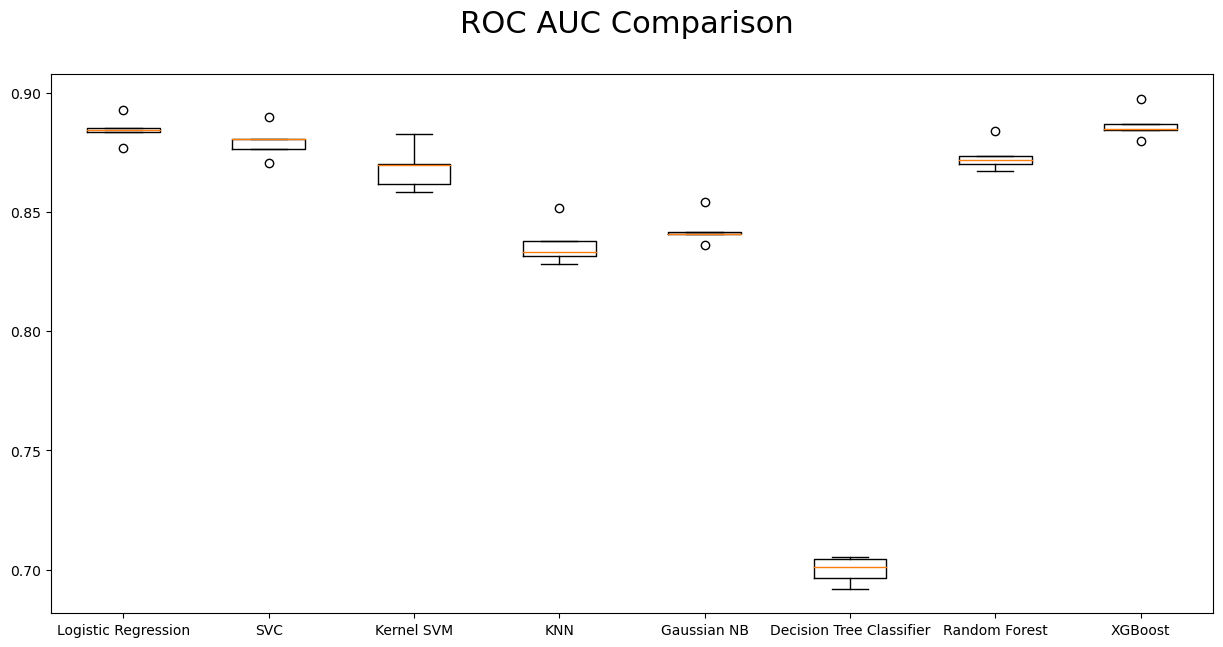

In [100]:
#using Area under ROC Curve:

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)


#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

In [101]:
#1.Fitting Logistic Regression to the Training set
classifier = LogisticRegression(solver='liblinear',
                                random_state = 0,
                                class_weight='balanced')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])
#-----------------------------------------------------------------------------------------------------------

#2. Fitting SVC to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['SVC', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = results.append(model_results, ignore_index = True)

#-------------------------------------------------------------------------------------------------------

#3. Fitting Kernel SVM to the Training set:

classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF Kernel)', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = results.append(model_results, ignore_index = True)
#-------------------------------------------------------------------------------------------------------

#4. Fitting KNN to the Training set:

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['KNN', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = results.append(model_results, ignore_index = True)

#-------------------------------------------------------------------------------------------------------

#5. Fitting Gaussian NB to the Training set:

classifier = GaussianNB()
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['GaussianNB', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = results.append(model_results, ignore_index = True)
#-------------------------------------------------------------------------------------------------------

#6. Fitting Decision Tree Classifier to the Training set:

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree Classifier', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = results.append(model_results, ignore_index = True)
#-------------------------------------------------------------------------------------------------------

#7. Fitting Random Forest to the Training set:

classifier = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = results.append(model_results, ignore_index = True)
#-------------------------------------------------------------------------------------------------------

#8. Fitting XGBoost to the Training set:

classifier = XGBClassifier(random_state=0)
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = results.append(model_results, ignore_index = True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
#Sort results based on the right classification metric:
#(Accuracy/ROC_AUC / Precision/Recall/F1/F2 scores)
# =======================================================================================================================

results = results.sort_values(["ROC-AUC" ,"Precision", "Recall", "F2 Score"], ascending = False)


print (results)

Faktor datasetnya balanced atau imbalanced juga diperhitungkan. Jika data balanced accuracy akan menjadi utama, jika data imbalanced makan ROC_AUC diutamakan. Karena data target imbalance, maka metric evaluasi yang akan digunakan nanti adalah ROC/AUC.

Menggunakan ROC_AUC Mean sebagai patukan dikarena ROC_AUC Mean adalah rata-rata dari ROC_AUC. Jadi ROC_AUC Mean lebih akurat daripada ROC_AUC

**Hyperparameter tuning untuk logistic regression dan Xgboost**

In [ ]:
#Mencari Hyperparameter terbaik untuk Logistic regression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score, f1_score



# Inisialisasi model Logistic Regression
logreg_model = LogisticRegression()

# Definisikan grid parameter yang akan diuji
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Definisikan metrik evaluasi sebagai ROC AUC dan F1
scoring = {
    'roc_auc': make_scorer(roc_auc_score),
    'f1': make_scorer(f1_score)
}

# Inisialisasi objek GridSearchCV
grid_search = GridSearchCV(logreg_model, param_grid, scoring=scoring, refit='roc_auc', cv=5)

# Lakukan grid search pada data train
grid_search.fit(X_train, y_train)

# Menampilkan hasil grid search
print("Best Parameters: ", grid_search.best_params_)
print("Best ROC AUC Score: {:.4f}".format(grid_search.best_score_))
print("Best F1 Score: {:.4f}".format(grid_search.cv_results_['mean_test_f1'][grid_search.best_index_]))

# Evaluasi model terbaik pada data test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
roc_auc_test = roc_auc_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print("ROC AUC Score on Test Set: {:.4f}".format(roc_auc_test))
print("F1 Score on Test Set: {:.4f}".format(f1_test))


In [ ]:
#Mencari Hyperparameter terbaik untuk XGBoost
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, roc_auc_score, f1_score


# Inisialisasi model XGBoost
xgb_model = XGBClassifier()

# Definisikan grid parameter yang akan diuji
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Definisikan metrik evaluasi sebagai ROC AUC dan F1
scoring = {
    'roc_auc': make_scorer(roc_auc_score),
    'f1': make_scorer(f1_score)
}

# Inisialisasi objek GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, scoring=scoring, refit='roc_auc', cv=5)

# Lakukan grid search pada data train
grid_search.fit(X_train, y_train)

# Menampilkan hasil grid search
print("Best Parameters: ", grid_search.best_params_)
print("Best ROC AUC Score: {:.4f}".format(grid_search.best_score_))
print("Best F1 Score: {:.4f}".format(grid_search.cv_results_['mean_test_f1'][grid_search.best_index_]))

# Evaluasi model terbaik pada data test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
roc_auc_test = roc_auc_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print("ROC AUC Score on Test Set: {:.4f}".format(roc_auc_test))
print("F1 Score on Test Set: {:.4f}".format(f1_test))

In [ ]:
#1.Fitting Logistic Regression to the Training set
classifier = LogisticRegression(solver='liblinear',
                                random_state = 0,
                                C = 100,
                                penalty = 'l2')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])
#-------------------------------------------------------------------------------------------------------

#8. Fitting XGBoost to the Training set:

classifier = XGBClassifier(random_state=0,
                           colsample_bytree = 0.9, learning_rate = 0.1, max_depth = 5, n_estimators = 200, subsample = 0.8)
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

results = results.append(model_results, ignore_index = True)

In [ ]:
#Semua Metrics Evaluasi untuk Logistic Regression dan XGBoost
# =======================================================================================================================

results = results.sort_values(["ROC-AUC" ,"Precision", "Recall", "F2 Score"], ascending = False)


print (results)

Setelah dilakukan hyperparameter tuning, nilai ROC AUC dari XGBoost sedikit meningkat dan lebih besar dari nilai ROC AUC dari Logistic Regression. Sehingga XGBoost dengan hyperparameternya akan digunakan untuk proses selanjutnya

# **5. Train & Evaluate Chosen Model**

In [ ]:
# Fit Xgboost on the Training dataset:

classifier = XGBClassifier(random_state=0, colsample_bytree = 0.9, learning_rate = 0.1, max_depth = 5, n_estimators = 200, subsample = 0.8)
model_xgb = classifier.fit(X_train, y_train)
model_xgb

# Predict the Test set results

y_pred = classifier.predict(X_test)

In [ ]:
y_test.value_counts()

In [ ]:
pd.DataFrame(y_pred)[0].value_counts()

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

##5.1 Variabel yang Paling Berpengaruh Dalam XGBClassifier

In [ ]:
classifier

In [ ]:
# Inisialisasi dan melatih model XGBoost
classifier = XGBClassifier(random_state=0, colsample_bytree = 0.9, learning_rate = 0.1, max_depth = 5, n_estimators = 200, subsample = 0.8)
classifier.fit(X_train, y_train)

# Plotting fitur importance
plt.figure(figsize=(10, 6))
sns.barplot(x=classifier.feature_importances_, y=df4.columns, palette='viridis', orient='h')
plt.title('Pentingnya Fitur pada XGBoost Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Fitur')
plt.show()

In [ ]:
# Ambil 5 kolom teratas yang berpengaruh secara positif
top_positive_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': classifier.feature_importances_
}).nlargest(5, 'Coefficient')



# Gabungkan keduanya menjadi satu DataFrame
top_features = pd.concat([top_positive_features])

# Plotting bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='viridis')
plt.title('Top 5 Fitur Pengaruh pada XGBoost Classifier')
plt.xlabel('Koefisien')
plt.ylabel('Fitur')
plt.show()


# **6. Model Deployment**

In [ ]:
!pip install pickle4

In [ ]:
import pickle

pickle.dump(model_xgb, open('model_xgb.pkl', 'wb'))

### 6.1 Framework API

In [ ]:
!pip install flask

In [ ]:
!pip install pyngrok==4.1.1

In [ ]:
!pip install flask_ngrok

In [ ]:
# # input pyngrok token
!ngrok authtoken 2YSR4y5Bg257ben4jTciv9fPcwa_78ERev6RbzPW7Mabcv6KQ

In [ ]:
# code
from flask import Flask, jsonify, request
from flask_ngrok import run_with_ngrok
from flask.json import JSONEncoder

app = Flask(__name__)
run_with_ngrok(app)

@app.route('/', methods=['GET'])
def index():
  return jsonify('WELCOME TO MACHINE LEARNING!')

@app.route('/predict', methods=['GET'])
def index2():
  data_baru = request.json
  df_baru = pd.DataFrame(data_baru, index=[0])
  df_baru.drop(columns='Capital Gain', inplace=True)
  df_baru.drop(columns='capital loss', inplace=True)
  df_baru.drop(columns='Education', inplace=True)

  # cleaning
  df_baru['Native Country'] = df_baru['Native Country'].apply(lambda x: 'USA' \
                              if x == 'United-States' else 'Non-USA')
  df_baru["Marital Status"] = df_baru["Marital Status"].replace(['Divorced','Separated', 'Widowed'], "Divorced")
  df_baru["Marital Status"] = df_baru["Marital Status"].replace(['Married-civ-spouse','Married-spouse-absent', 'Married-AF-spouse'], "Married")
  df_baru['Race'] = df_baru['Race'].apply(lambda x: 'White' if x == 'White' else 'Non-White')

  # encoding data kategorikal
  df_baru = pd.get_dummies(df_baru)
  for kolom in encoding_columns:
    if kolom not in df_baru.columns:
        df_baru[kolom] = 0

  for kolom in df_baru.columns:
    if kolom not in encoding_columns:
      df_baru.drop(columns=kolom, inplace=True) # karena one hot (drop_first=True)

  df_baru = df_baru[encoding_columns] # match column

  # scaling
  scaler = RobustScaler()
  df4_scaled = scaler.fit_transform(df4)
  df_baru_scaled = scaler.transform(df_baru)

  # Custom JSONEncoder class to handle int64 serialization
  class CustomJSONEncoder(JSONEncoder):
      def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

  # Register the custom JSONEncoder with Flask
  app.json_encoder = CustomJSONEncoder

  with open('/content/model_xgb.pkl', 'rb') as file:
    xgb = pickle.load(file)

  prediction = xgb.predict(df_baru_scaled)
  if prediction[0] == 0:
    income_pred = '<=50K'
  elif prediction[0] == 1:
    income_pred = '>50K'

  return jsonify({"Status Prediksi":"Berhasil",
                 "Hasil Prediksi Income":income_pred})

if __name__ == '__main__':
  app.run()